In [ ]:
#Import the pre-trained Wiki Words Words2Vec model
import tensorflow as tf
import tensorflow_hub as hub

#Load pretrained wiki words model
embed = hub.load("https://www.kaggle.com/models/google/wiki-words/frameworks/TensorFlow2/variations/250/versions/1")

In [ ]:
#Parse the data into dictoniaries
from bs4 import BeautifulSoup
import pandas as pd

def populateData(aDataFile):
  print(f"Processing - {aDataFile}")

  with open(aDataFile) as reutersFile:
    content = reutersFile.read()

  soup = BeautifulSoup(content, "html.parser")

  data = []

  for article in soup.find_all('reuters'):

    #TODO - add unknown topics
    if article.topics != None and article.topics != "":
      #Parsing multiple topics per content
      topics = article.topics.find_all('d')
      textTopics = []

      for topic in topics:
        textTopics.append(topic.text)

      if len(textTopics) == 0:
        textTopics.append('unknown')

      #Forming content column by concatenating title and body
      title = article.title.text if article.title else ''
      body = article.body.text if article.body else ''

      if (title == '' and body == ''):
        continue

      content = title + " " + body
      content = content.replace("\n", " ")

      #Adding to list
      data.append({
        "content": content,
        "topics": textTopics
        })

  # print(f"Length of data from file - {len(data)}")
  return data



In [ ]:
#Get all data files
import os

fullData = []
dirPath = "/content/data"

for aFile in os.listdir(dirPath):
  if aFile.endswith(".sgm"):
    filePath = os.path.join(dirPath, aFile)

    fileData = populateData(filePath)

    # fullData.append(fileData)
    fullData = fullData + fileData

    # print(f"Current length of full data - {len(fullData)}")


Processing - /content/data/reut2-005.sgm
Processing - /content/data/reut2-009.sgm
Processing - /content/data/reut2-001.sgm
Processing - /content/data/reut2-008.sgm
Processing - /content/data/reut2-010.sgm
Processing - /content/data/reut2-002.sgm
Processing - /content/data/reut2-012.sgm
Processing - /content/data/reut2-003.sgm
Processing - /content/data/reut2-016.sgm
Processing - /content/data/reut2-014.sgm
Processing - /content/data/reut2-018.sgm
Processing - /content/data/reut2-000.sgm
Processing - /content/data/reut2-004.sgm
Processing - /content/data/reut2-020.sgm
Processing - /content/data/reut2-019.sgm
Processing - /content/data/reut2-007.sgm
Processing - /content/data/reut2-013.sgm
Processing - /content/data/reut2-015.sgm
Processing - /content/data/reut2-006.sgm
Processing - /content/data/reut2-011.sgm
Processing - /content/data/reut2-021.sgm


In [ ]:
#Vectorize content

tempContents = [d["content"] for d in fullData]
print(f"Confirming size of original data set - {len(fullData)}")

#Word2Vec model returns a tensor
vectorizedTensor = embed(tempContents)

#Convert tensor to dataframe
numpyArray = vectorizedTensor.numpy()
dfContent = pd.DataFrame(numpyArray)
dfContent.head()
# dfContent.describe()

Confirming size of original data set - 19845


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.254949,-0.305960,0.096987,-0.326686,-0.109353,0.295412,0.217110,0.223131,0.033171,0.277735,...,-0.178171,0.422760,-0.042544,-0.036273,0.130892,0.013524,0.042472,-0.065017,0.061244,-0.056306
1,-0.231969,-0.226344,0.030972,-0.245658,-0.042217,0.347854,0.159751,0.232130,0.027469,0.220794,...,-0.201943,0.378741,0.101791,0.026294,0.169113,-0.059169,0.067684,0.000255,0.090499,-0.089627
2,-0.338693,-0.728948,0.332346,-0.476871,0.044830,0.529728,0.155145,0.131299,-0.016539,0.495683,...,-0.235388,0.738382,0.266954,0.101719,0.193045,0.071697,0.243102,-0.204634,0.121219,-0.030992
3,-1.140095,-1.190301,0.451061,-1.074146,-0.231453,0.951712,0.416787,-0.008928,0.215726,0.819216,...,-0.328773,1.611461,0.312346,0.203082,0.091201,-0.326601,0.169223,0.035476,0.406898,-0.256344
4,-0.445562,-0.452963,0.399474,-0.529976,-0.100661,0.503825,0.141334,0.119486,0.002798,0.261083,...,-0.041392,0.577078,0.098456,0.047716,0.112595,-0.184179,-0.123071,-0.048180,0.194516,-0.193133


In [ ]:
#One Hot Encode Labels

from sklearn.preprocessing import MultiLabelBinarizer

allTopics = pd.read_csv("/content/data/topics.csv", header=None)
allTopicsList = allTopics[0].tolist()

tempLabels = [d["topics"] for d in fullData]


print(f"Topics - {allTopicsList}")
mlb = MultiLabelBinarizer(classes=allTopicsList)

mlb.fit(allTopicsList)
one_hot_labels = mlb.transform(tempLabels)

dfLabels = pd.DataFrame(one_hot_labels)

dfLabels.sum(axis=1)


Topics - ['acq', 'alum', 'austdlr', 'austral', 'barley', 'bfr', 'bop', 'can', 'carcass', 'castor-meal', 'castor-oil', 'castorseed', 'citruspulp', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'corn-oil', 'cornglutenfeed', 'cotton', 'cotton-meal', 'cotton-oil', 'cottonseed', 'cpi', 'cpu', 'crude', 'cruzado', 'dfl', 'dkr', 'dlr', 'dmk', 'drachma', 'earn', 'escudo', 'f-cattle', 'ffr', 'fishmeal', 'flaxseed', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-meal', 'groundnut-oil', 'heat', 'hk', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'inventories', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-meal', 'lin-oil', 'linseed', 'lit', 'livestock', 'lumber', 'lupin', 'meal-feed', 'mexpeso', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-meal', 'palm-oil', 'palmkernel', 'peseta', 'pet-chem', 'platinum', 'plywood', 'pork-belly', 'potato', 'pro

0        1
1        1
2        2
3        1
4        1
        ..
19840    1
19841    1
19842    1
19843    1
19844    1
Length: 19845, dtype: int64

In [ ]:
#Form final dataframe to hand off to the neural network for training

# Add suffix _x or _y
dfContent = dfContent.add_suffix('_x')
dfLabels = dfLabels.add_suffix('_y')


In [ ]:
## Lets import RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

rf_model = RandomForestClassifier(n_estimators=20,max_depth=10, min_samples_leaf=5, random_state=0)

X = dfContent
y = dfLabels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

rf_model.fit(X_train, y_train)

# Calculate testing error.
y_pred_class = rf_model.predict(X_test)
train_accuracy = metrics.accuracy_score(y_train, rf_model.predict(X_train))

print('the Train accuracy is: ', train_accuracy)
train_error = 1 - train_accuracy

print('the Train error is: ', train_error)

testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('the Testing accuracy is: ',testing_accuracy)
testing_error = 1 - testing_accuracy

print('the Testing error is: ',testing_error)

the Train accuracy is:  0.5651927437641724
the Train error is:  0.4348072562358276
the Testing accuracy is:  0.5086923658352229
the Testing error is:  0.4913076341647771


In [ ]:
import numpy as np
import seaborn as sns

# Get and reshape confusion matrix data
matrix = metrics.confusion_matrix(
    y_test.values.argmax(axis=1),
    y_pred_class.argmax(axis=1)
)

display(matrix)

print(metrics.classification_report(    y_test.values.argmax(axis=1),
    y_pred_class.argmax(axis=1)))

array([[202,   0,   0, ...,   0,   0,   0],
       [  9,   0,   0, ...,   0,   0,   0],
       [  7,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       [  5,   0,   0, ...,   0,   0,   0]])

              precision    recall  f1-score   support

           0       0.14      0.47      0.22       428
           1       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        18
          17       0.00      0.00      0.00        15
          19       0.00      0.00      0.00        36
          22       0.00      0.00      0.00         6
          26       0.00      0.00      0.00        14
          28       1.00      0.03      0.07        89
          32       0.00      0.00      0.00        31
          35       0.95    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
'''Keras Sequential Model
'''
import keras
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

model = keras.models.Sequential()

model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=.2))
model.add(keras.layers.Dense(y_train.shape[1]))


In [ ]:
# Compile model
model.compile(loss=CategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])


In [ ]:
model(X_train.values)

<tf.Tensor: shape=(15876, 136), dtype=float32, numpy=
array([[-0.00966243,  0.02038509,  0.07130552, ...,  0.04248886,
        -0.02310079,  0.01286551],
       [ 0.01332482,  0.02290457,  0.16318329, ...,  0.07159399,
        -0.02846983, -0.01616753],
       [ 0.01992245,  0.04934867,  0.08391903, ...,  0.03517687,
        -0.0005003 , -0.01683898],
       ...,
       [-0.02094171,  0.04195338,  0.1784023 , ...,  0.10791299,
        -0.02406327, -0.009428  ],
       [-0.00399228,  0.02352284,  0.12494785, ...,  0.06643348,
        -0.01589701,  0.00116807],
       [-0.05052854,  0.06415278,  0.41849586, ...,  0.2165792 ,
        -0.00630125, -0.05817961]], dtype=float32)>

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (15876, 200)              50200     
                                                                 
 batch_normalization_72 (Ba  (15876, 200)              800       
 tchNormalization)                                               
                                                                 
 dense_108 (Dense)           (15876, 100)              20100     
                                                                 
 batch_normalization_73 (Ba  (15876, 100)              400       
 tchNormalization)                                               
                                                                 
 dense_109 (Dense)           (15876, 50)               5050      
                                                                 
 batch_normalization_74 (Ba  (15876, 50)             

In [ ]:
# Set callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Fit model
history = model.fit(x=X_train, y=y_train, epochs=500, batch_size=64, workers=10, validation_split=0.2, callbacks=[callback])


Epoch 1/500
199/199 [==============================] - 4s 10ms/step - loss: 5.1180 - accuracy: 0.2227 - val_loss: 5.0612 - val_accuracy: 0.2210
Epoch 2/500
199/199 [==============================] - 2s 8ms/step - loss: 4.1420 - accuracy: 0.4566 - val_loss: 4.0798 - val_accuracy: 0.5271
Epoch 3/500
199/199 [==============================] - 1s 6ms/step - loss: 3.5414 - accuracy: 0.5490 - val_loss: 3.3004 - val_accuracy: 0.5853
Epoch 4/500
199/199 [==============================] - 1s 6ms/step - loss: 3.1044 - accuracy: 0.5973 - val_loss: 2.8173 - val_accuracy: 0.6209
Epoch 5/500
199/199 [==============================] - 1s 6ms/step - loss: 2.7694 - accuracy: 0.6263 - val_loss: 2.5371 - val_accuracy: 0.6436
Epoch 6/500
199/199 [==============================] - 1s 6ms/step - loss: 2.5258 - accuracy: 0.6432 - val_loss: 2.2616 - val_accuracy: 0.6593
Epoch 7/500
199/199 [==============================] - 1s 6ms/step - loss: 2.3258 - accuracy: 0.6602 - val_loss: 2.2235 - val_accuracy: 0.665

125/125 [==============================] - 0s 3ms/step - loss: 1.7035 - accuracy: 0.7133


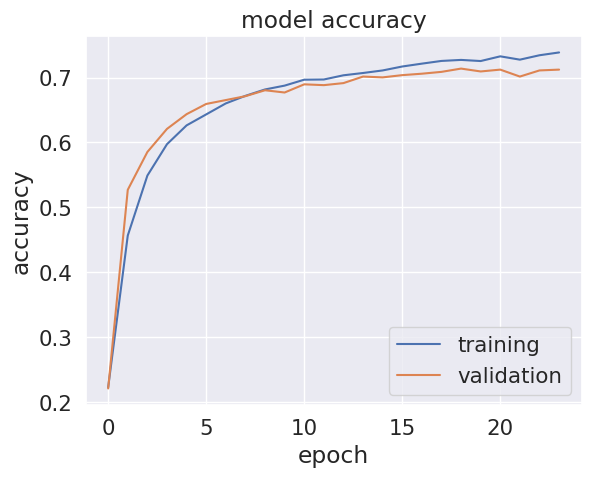

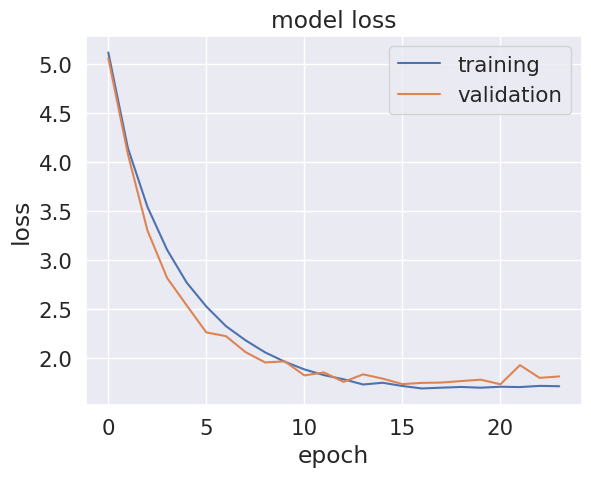

Test loss: 1.7
Test accuracy: 0.713


In [ ]:
from matplotlib import pyplot as plt
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
'''MLPClassifier
'''
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# all features
# X = dfContent
# y = dfLabels

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred_class = mlp.predict(X_test)
train_accuracy = metrics.accuracy_score(y_train, mlp.predict(X_train))

print('the Train accuracy is: ', train_accuracy)
train_error = 1 - train_accuracy

print('the Train error is: ', train_error)

testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('the Testing accuracy is: ',testing_accuracy)
testing_error = 1 - testing_accuracy

print('the Testing error is: ',testing_error)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


the Train accureacy is:  0.737087427563618
the Train error is:  0.262912572436382
the Testing accuracy is:  0.6873267825648778
the Testing error is:  0.3126732174351222
